In [39]:
import csv

data = []
with open('data/train.csv') as fin:
    reader = csv.reader(fin, delimiter=',')
    next(reader, None)
    for row in reader:
        data.append(row)

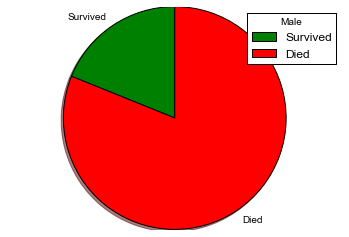

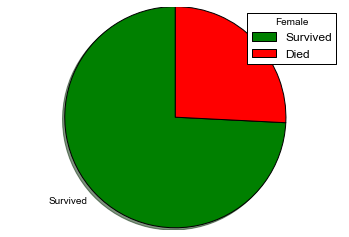

Male: 109 survived, 468 died
Female: 233 survived, 81 died


In [30]:
male_survived = [x for x in data if x[1] == '1' and x[4] == 'male']
female_survived = [x for x in data if x[1] == '1' and x[4] == 'female']

male_killed = [x for x in data if x[1] == '0' and x[4] == 'male']
female_killed = [x for x in data if x[1] == '0' and x[4] == 'female']

%matplotlib inline
import matplotlib.pyplot as plt
labels = ['Survived', 'Died']
sizes = [len(male_survived), len(male_killed)]
colors = ['green', 'red']
# explode = (0.1, 0, 0, 0)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=90)
plt.legend(title="Male")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

labels = ['Survived', 'Died']
sizes = [len(female_survived), len(female_killed)]
colors = ['green', 'red']
# explode = (0.1, 0, 0, 0)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=90)
plt.legend(title="Female")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

print 'Male: %d survived, %d died' % (len(male_survived), len(male_killed))
print 'Female: %d survived, %d died' % (len(female_survived), len(female_killed))

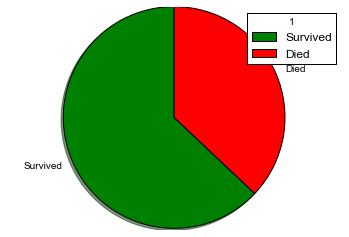

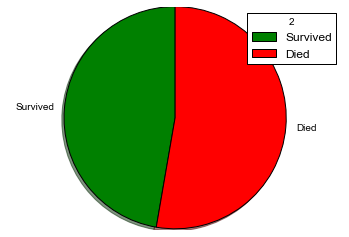

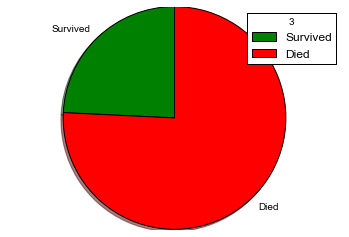

In [31]:
classes = list(set([x[2] for x in data]))
classes.sort()

for clas in classes:
    survived = sum([1 for x in data if x[1] == '1' and x[2] == clas])
    died = sum([1 for x in data if x[1] == '0' and x[2] == clas])

    labels = ['Survived', 'Died']
    sizes = [survived, died]
    colors = ['green', 'red']
    # explode = (0.1, 0, 0, 0)
    plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=90)
    plt.legend(title=clas)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.show()

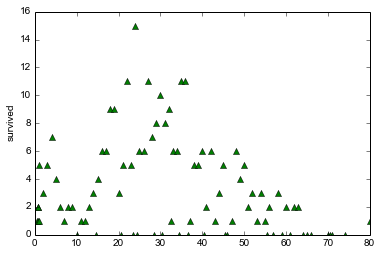

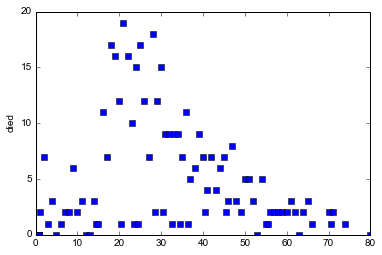

In [33]:
ages = list(set([x[5] for x in data]))
ages.sort()

survived = []
died = []
for age in ages:
    s = sum([1 for x in data if x[1] == '1' and x[5] == age])
    d = sum([1 for x in data if x[1] == '0' and x[5] == age])
    
    survived.append(s)
    died.append(d)

%matplotlib inline
import matplotlib.pyplot as plt

ages.pop(0)
survived.pop(0)
died.pop(0)

ages = [float(age) for age in ages]

plt.figure(1)
plt.ylabel('survived')
plt.plot(ages, survived, 'g^')

plt.figure(2)
plt.plot(ages, died, 'bs')
plt.ylabel('died')
plt.show()

In [34]:
embarked = list(set([x[11] for x in data]))
embarked.sort()

survived = []
died = []
for em in embarked:
    s = sum([1 for x in data if x[1] == '1' and x[11] == em])
    d = sum([1 for x in data if x[1] == '0' and x[11] == em])
    survived.append(s)
    died.append(d)
    
    print em, ':', s, 'survived,', d, 'died'

 : 2 survived, 0 died
C : 93 survived, 75 died
Q : 30 survived, 47 died
S : 217 survived, 427 died


In [119]:
processed = [[x[2]] + x[4:8] + x[10:] for x in data]

cabins = list(set([x[-2] for x in processed]))
cabins.sort()
embarked = list(set([x[-1] for x in processed]))
embarked.sort()

for x in processed:
    x[0] = int(x[0])
    x[1] = 1 if x[1] == 'male' else 0
    x[2] = 0. if x[2] == '' else float(x[2])
    x[3] = int(x[3])
    x[4] = int(x[4])
    x[5] = cabins.index(x[5])
    x[6] = embarked.index(x[6])
    x.append(x[0] * 100 + x[1] * 10)
    x.append(x[2] * 100 + x[1] * 10)

In [122]:
ftr = processed
ltr = [int(x[1]) for x in data]

In [123]:
from sklearn.cross_validation import train_test_split

train_f, test_f, train_l, test_l = train_test_split(ftr, ltr, test_size=0.33)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, n_jobs=-1)
clf.fit(train_f, train_l)

predicted = clf.predict(test_f)

from sklearn.metrics import precision_score, recall_score
print 'Precision', precision_score(test_l, predicted)
print 'Recall', recall_score(test_l, predicted)

Precision 0.743119266055
Recall 0.743119266055


In [124]:
print clf.feature_importances_

[ 0.04491668  0.23797127  0.16967013  0.06512953  0.05232143  0.10352121
  0.05325993  0.12108588  0.15212395]


In [75]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, n_estimators=50) 

param_grid = { 
    'n_estimators': [10, 15, 20, 25, 30, 50]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(ftr, ltr)
print CV_rfc.best_params_

{'n_estimators': 50}


In [114]:
import csv

test_data = []
with open('data/test.csv') as fin:
    reader = csv.reader(fin, delimiter=',')
    next(reader, None)
    for row in reader:
        test_data.append(row)

In [115]:
test_processed = [[x[1]] + x[3:7] + x[9:] for x in test_data]

for x in test_processed:
    x[0] = int(x[0])
    x[1] = 1 if x[1] == 'male' else 0
    x[2] = 0. if x[2] == '' else float(x[2])
    x[3] = int(x[3])
    x[4] = int(x[4])
    x[5] = -1 if x[5] not in cabins else cabins.index(x[5])
    x[6] = -1 if x[6] not in embarked else embarked.index(x[6])
    x.append(x[0] * 100 + x[1] * 10)
    x.append(x[2] * 100 + x[1] * 10)

In [116]:
ft = test_processed
lt = None

In [117]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, n_jobs=-1)
clf.fit(ftr, ltr)
lt = clf.predict(ft)

In [118]:
import csv

pids = [x[0] for x in test_data]
with open('titanic_predicted.csv', 'wb+') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['PassengerId', 'Survived'])
    for (pid, pred) in zip(pids, lt):
        writer.writerow([pid, pred])